

1.   Passive, HM, LR



# DogGo Customer Segmentation Project

## Introduction
DogGo is an application whose goal is to match dog owners and dog walkers. DogGO trains its dog walkers and matches them to the most appropriate dog and its owner. Associates of DogGo would like to be very good at matching and customer satisfaction. One of the steps of improving customer satisfaction is defining the different customer segmentations. For example, if it is known that which customer belongs to which cluster, a campaign can be organized directly to related customers. In order to reach the right customer in the right cluster, customer segmentation must be applied quite accurately.RFM analysis is one of the most common approach for customer segmentation. Values of recency, monetary and frequency that belong to customers are used for clustering. Tenure, which means lifetime of customer, can be used as fourth criteria as in this project. Clustering is carried out K-means and GMM algorithms in this project and clusters are labeled according to outputs

## Approach

DogGo collects the different types of data related to owners, dogs, walkers, etc. Walks Customer Segment and Owner datasets are the most proper two to cluster the customer. The Walks Customer Segment and the Owners datasets are merged, and it consists of 49 columns and 61,275 transactions.

Firstly, the dataset is investigated to understand it, and data wrangling processes are carried out to get the dataset ready to model. As a next step, exploratory data analysis is completed to get some insights from the dataset.

The standard deviation of the amount is so high when it compares with mean. The most spending customer affects the standard deviation, and this customer will not be taken into account because it is an outlier. The numbers less than 16.48 can be misleading amounts, and they affect the mean, and they will be replaced with the median of the amount. Then, two walk statuses are finished and canceled. Finished walks are used to calculate RFM because canceled walks are not proper transactions.

RFM and tenure columns are generated using the part from the last year. However, the analysis will be repeated for each six months period and using whole data. The results and migration between clusters will be compared.

Frequency and monetary are highly correlated, so frequency is excluded from RFM analysis. The analyses are completed using Recency, Monetary and Tenure features. Next, Recency, Monetary and Tenure features are tried to normalize using four different transformation methods: square root, reciprocal, log, and boxcox. All process failed, but the nearest values to normal distribution are obtained thanks to boxcox method. As a next step, Minmax scaler and Robust scaler are used to scale the data, and Minmax scaler gives better results.

Clustering is carried out using K-means and GMM algorithms, and their results are plotted on two dimensions. PCA is used to convert from 3 to 2 dimensions. Different pairs are plotted to understand the differences of clusters such as tenure with recency or recency with monetary. The clusters are labelled according to descriptive values and visualizations such as plots mentioned above and snake plots.




## Pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_owners = pd.read_excel("/content/drive/MyDrive/DogGo/owners.xlsx")

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DogGo/walksCustomerSegment.xlsx")

In [ ]:
df = pd.merge(df, df_owners, left_on="ownerid", right_on="id", how='left')

In [ ]:
df.head()

,Unnamed: 0_x,Unnamed: 0.1_x,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,ownerid,walkingid,walkid,walkerid,dogid,paymentid,walkingtype,walkstatus,duration,ordercreatedtime,checkintime,confirmtime,matchtime,starttime,endtime,cancelledby,cancelreason,heat,walkgroup,distance,district,neighborhood,walkerF_commWithPeople,walkerF_commWithPariahDog,walkerF_commWithStreetCat,walkerF_goodPath,walkerF_walkWithDogAgain,walkerF_note,ownerF_commWithMe,ownerF_commWithDog,ownerF_timeAccuracy,ownerF_appPerformance,ownerF_note,paymentstatus,paymenttype,amount,discount,walkerincome,promocodeid,finishtime,Unnamed: 0_y,Unnamed: 0.1_y,id,mgapplytime,signuptime,firstdogaddedtime
0,0,0,0,0,61000,00d2941f-7e9f-4422-a662-2d9012607d35,810c2b91-3962-4a46-9d2c-0b8d2466476c,810c2b91-3962-4a46-9d2c-0b8d2466476c,5b15dbef-554c-4e9d-8e78-29b034cdcb25,436db8e3-981c-4c74-97b8-a2ecbbed07a2,b0095c6f-e810-4d53-94ba-4edd1e852bb4,Boarding,Finished,NaN,2021-02-09 21:24:14.228,2021-02-12 03:00:00,2021-02-12 05:50:24.404,2021-02-10 09:48:06.177,2021-02-12 12:07:05.207,NaT,NaN,NaN,NaN,NaN,NaN,Kağıthane,Çeliktepe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,89.900000,0.0,120.46,NaN,2021-02-14 17:20:28.268,27378.0,27378.0,00d2941f-7e9f-4422-a662-2d9012607d35,2021-01-13 13:25:43.583,2020-11-22 19:05:28.360,2020-11-22 19:11:03.686
1,1,1,1,1,61001,00d2941f-7e9f-4422-a662-2d9012607d35,810c2b91-3962-4a46-9d2c-0b8d2466476c,810c2b91-3962-4a46-9d2c-0b8d2466476c,5b15dbef-554c-4e9d-8e78-29b034cdcb25,436db8e3-981c-4c74-97b8-a2ecbbed07a2,b0095c6f-e810-4d53-94ba-4edd1e852bb4,Boarding,Finished,NaN,2021-02-09 21:24:14.228,2021-02-13 03:00:00,2021-02-12 05:50:24.404,2021-02-10 09:48:06.177,2021-02-12 12:07:05.207,NaT,NaN,NaN,NaN,NaN,NaN,Kağıthane,Çeliktepe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,89.900000,0.0,120.46,NaN,2021-02-14 17:20:28.268,27378.0,27378.0,00d2941f-7e9f-4422-a662-2d9012607d35,2021-01-13 13:25:43.583,2020-11-22 19:05:28.360,2020-11-22 19:11:03.686
2,2,2,2,2,61002,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-15 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225
3,3,3,3,3,61003,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-16 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225
4,4,4,4,4,61004,016038b4-2391-44d7-9391-7d622f537ac5,437d9524-c3b9-4491-adae-6e5d21a4d1cd,437d9524-c3b9-4491-adae-6e5d21a4d1cd,b71ffc33-0dab-4c92-bb6e-8e16e2b3d980,576a59c0-fc12-427c-ab02-c1b2b4c6ede1,fcf25ec2-0153-49c1-ad88-43464b1a4a58,Boarding,Finished,NaN,2020-11-02 13:36:46.512,2020-11-17 03:00:00,2020-11-12 12:51:06.849,2020-11-10 12:23:38.922,2020-11-13 14:20:16.152,NaT,NaN,NaN,NaN,NaN,NaN,Kadıköy,Fenerbahçe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,Paid,154.285714,0.0,800.00,NaN,2020-11-20 14:41:09.625,9818.0,9818.0,016038b4-2391-44d7-9391-7d622f537ac5,NaT,2020-11-02 12:42:20.316,2020-11-02 12:52:48.225


In [ ]:
df.shape

(64565, 51)

### Missing Values
Detecting missing values is important because missing values can be effect the RFM creating proceses and customer segmentation. Each variable is not necessary to create RFM. The most important columns are ownerid, walkingid, checkintime and amount. They will be used to crate recency, frequency and monetary columns. There is no missing value in those variables.

In [ ]:
#checking the missing values

df.isna().sum()

Unnamed: 0_x                     0
Unnamed: 0.1_x                   0
Unnamed: 0.1.1                   0
Unnamed: 0.1.1.1                 0
Unnamed: 0.1.1.1.1               0
ownerid                          0
walkingid                        0
walkid                           0
walkerid                      1121
dogid                            0
paymentid                        0
walkingtype                      0
walkstatus                       0
duration                       275
ordercreatedtime                 0
checkintime                      0
confirmtime                  13429
matchtime                    59753
starttime                     1143
endtime                       1418
cancelledby                  63419
cancelreason                 63421
heat                          1418
walkgroup                    19875
distance                      1367
district                         0
neighborhood                 43809
walkerF_commWithPeople       56791
walkerF_commWithPari

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64565 entries, 0 to 64564
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0_x               64565 non-null  int64         
 1   Unnamed: 0.1_x             64565 non-null  int64         
 2   Unnamed: 0.1.1             64565 non-null  int64         
 3   Unnamed: 0.1.1.1           64565 non-null  int64         
 4   Unnamed: 0.1.1.1.1         64565 non-null  int64         
 5   ownerid                    64565 non-null  object        
 6   walkingid                  64565 non-null  object        
 7   walkid                     64565 non-null  object        
 8   walkerid                   63444 non-null  object        
 9   dogid                      64565 non-null  object        
 10  paymentid                  64565 non-null  object        
 11  walkingtype                64565 non-null  object        
 12  walk

In [ ]:
unnamed_cols = [col for col in df.columns if 'Unnamed: ' in col]
print(unnamed_cols)

['Unnamed: 0_x', 'Unnamed: 0.1_x', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0_y', 'Unnamed: 0.1_y']


In [ ]:
df = df.drop(unnamed_cols, axis=1)

In [ ]:
df.describe()

,duration,distance,walkerF_commWithPeople,walkerF_commWithPariahDog,walkerF_commWithStreetCat,walkerF_goodPath,walkerF_walkWithDogAgain,ownerF_commWithMe,ownerF_commWithDog,ownerF_timeAccuracy,ownerF_appPerformance,amount,discount,walkerincome
count,64290.0,63198.000000,7774.000000,7774.000000,7774.000000,7774.000000,7774.000000,4478.000000,4478.000000,4478.000000,4478.000000,64565.000000,62713.000000,62713.000000
mean,45.0,5.418176,0.978647,0.852843,0.845897,0.953692,0.974273,0.991961,0.989058,0.987271,0.980348,26.251791,14.773813,17.658943
std,0.0,166.602915,0.144568,0.354285,0.361071,0.210165,0.158329,0.089311,0.104044,0.112115,0.138816,6.793103,101.021468,21.483709
min,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,45.0,0.864714,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,15.000000
50%,45.0,1.744401,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,0.000000,15.250000
75%,45.0,2.599516,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.900000,0.000000,17.100000
max,45.0,10239.525872,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,168.750000,1120.000000,1050.000000


## Exploratory Data Analysis
In this part, data visualization will be carried out to understand datasets deeply. According to insights extracted from graphs, necessary corrections can be made. If there is a correction or change, it will be explained below the related graph or code.

In [ ]:
owner_first10 = (df["ownerid"].value_counts(sort= True).head(10))


In [ ]:
owner_first10_total = owner_first10.sum()


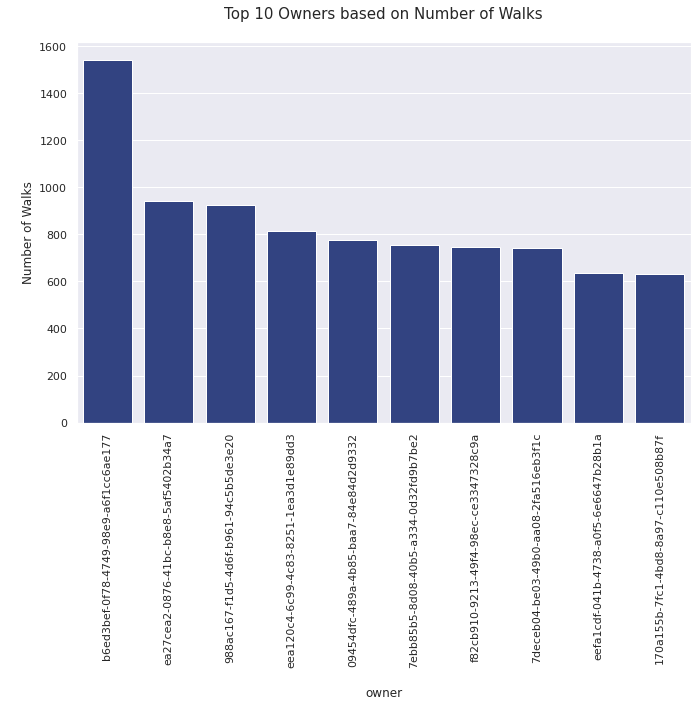

In [ ]:
owner_total = df["ownerid"].value_counts(sort= True).sum()
owner_first10 = df["ownerid"].value_counts(sort= True).head(10)



owner_first10 = pd.DataFrame(owner_first10)
owner_first10 = owner_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "ownerid", data= owner_first10, color='#253B8E')
plt.xlabel("\nowner")
plt.ylabel("\nNumber of Walks")
plt.title("Top 10 Owners based on Number of Walks\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby("ownerid").count()

,walkingid,walkid,walkerid,dogid,paymentid,walkingtype,walkstatus,duration,ordercreatedtime,checkintime,confirmtime,matchtime,starttime,endtime,cancelledby,cancelreason,heat,walkgroup,distance,district,neighborhood,walkerF_commWithPeople,walkerF_commWithPariahDog,walkerF_commWithStreetCat,walkerF_goodPath,walkerF_walkWithDogAgain,walkerF_note,ownerF_commWithMe,ownerF_commWithDog,ownerF_timeAccuracy,ownerF_appPerformance,ownerF_note,paymentstatus,paymenttype,amount,discount,walkerincome,promocodeid,finishtime,id,mgapplytime,signuptime,firstdogaddedtime
ownerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00103671-a728-4c07-9b39-cf2b7c1b7756,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,1,1
0062f2a6-878d-4100-9bea-2b50e266a56e,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1
008fabab-f868-4019-8b50-4022025b51b2,58,58,52,58,58,58,58,58,58,58,52,0,52,52,6,6,52,53,52,58,45,8,8,8,8,8,2,0,0,0,0,0,51,51,58,51,51,2,0,58,0,58,58
00bca807-7ecb-40aa-ae97-46564bdd11b7,70,70,70,70,70,70,70,70,70,70,55,0,70,70,0,0,70,0,70,70,0,12,12,12,12,12,0,0,0,0,0,0,70,70,70,70,70,19,0,70,0,70,70
00d2941f-7e9f-4422-a662-2d9012607d35,2,2,2,2,2,2,2,0,2,2,2,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffba3af2-91e4-43cb-a4f4-2c34d57288af,5,5,5,5,5,5,5,5,5,5,5,0,5,5,0,0,5,5,5,5,5,1,1,1,1,1,0,0,0,0,0,0,5,5,5,5,5,1,0,5,5,5,5
ffbbc6cf-c577-490f-ae45-36166b09d4a7,8,8,5,8,8,8,8,8,8,8,5,0,5,5,3,3,5,0,5,8,0,1,1,1,1,1,0,2,2,2,2,1,5,5,8,5,5,1,0,8,0,8,8
ffcc0f44-ecd8-4438-8f27-77c4b35ed37d,6,6,6,6,6,6,6,6,6,6,6,0,6,6,0,0,6,6,6,6,3,1,1,1,1,1,0,3,3,3,3,0,6,6,6,6,6,0,0,6,0,6,6


Top ten owners according to number of walks represents frequency in other word the f column and the graph above shows that there is a customer that has many transaction and there is a significant difference between first customer and second customer. The other ones are similar to each other.

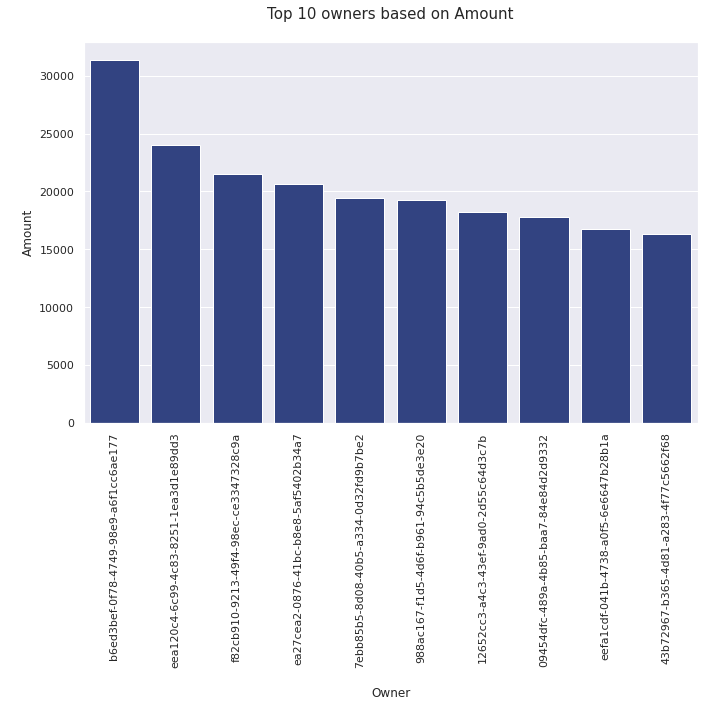

In [ ]:
amount_owner = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
amount_owner_total = df["amount"].sum()
amount_owner20 = amount_owner.head(10)

amount_owner20 = pd.DataFrame(amount_owner20)
amount_owner20 = amount_owner20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "ownerid", y= "amount", data= amount_owner20, color='#253B8E')
plt.xlabel("\nOwner")
plt.ylabel("\nAmount")
plt.title("Top 10 owners based on Amount\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

This graph is similar to previous graph, the difference is this graph repsesent monetary it means it is based on amount. there is also another similarity that a customer spent money distictly. Mean and standard deviation will be investigated below as a next step of the effect of this difference.

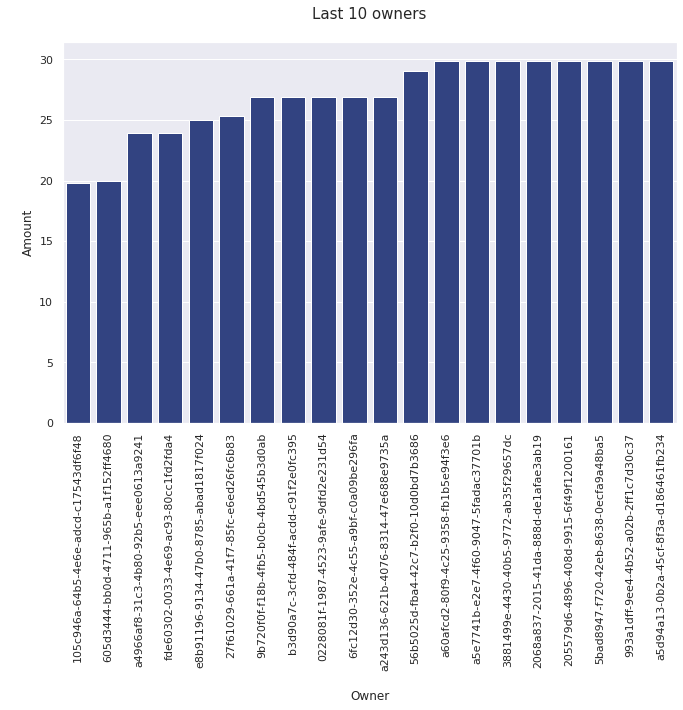

In [ ]:
amount_owner = df.groupby("ownerid")["amount"].sum().sort_values()
amount_owner20 = amount_owner.head(20)

amount_owner20 = pd.DataFrame(amount_owner20)
amount_owner20 = amount_owner20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "ownerid", y= "amount", data= amount_owner20, color='#253B8E')
plt.xlabel("\nOwner")
plt.ylabel("\nAmount")
plt.title("Last 10 owners\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


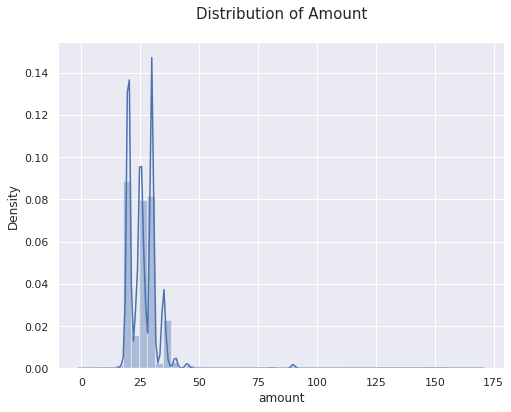

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df["amount"])
plt.title("Distribution of Amount\n", fontsize = 15)
plt.show()

The amount distribution is not like normal distribution.

In [ ]:
gby_ownerid = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
gby_ownerid

ownerid
b6ed3bef-0f78-4749-98e9-a6f1cc6ae177    31350.840000
eea120c4-6c99-4c83-8251-1ea3d1e89dd3    23992.080000
f82cb910-9213-49f4-98ec-ce3347328c9a    21524.990000
ea27cea2-0876-41bc-b8e8-5af5402b34a7    20674.215037
7ebb85b5-8d08-40b5-a334-0d32fd9b7be2    19432.000000
                                            ...     
e8b91196-9134-47b0-8785-abad1817f024       25.000000
fde60302-0033-4e69-ac93-80cc1fd2fda4       23.920000
a4966af8-31c3-4b80-92b5-eee0613a9241       23.920000
605d3444-bb0d-4711-965b-a1f152ff4680       20.000000
105c946a-64b5-4e6e-adcd-c17543df6f48       19.790000
Name: amount, Length: 1558, dtype: float64

In [ ]:
gby_ownerid.describe()

count     1558.000000
mean      1087.899177
std       2482.511568
min         19.790000
25%         59.900000
50%        274.500000
75%        934.370000
max      31350.840000
Name: amount, dtype: float64

The standard deviation of the amount is so high when it compares with mean. The most spending customer affects the standard deviation, and this customer will not be taken into account because it is an outlier.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


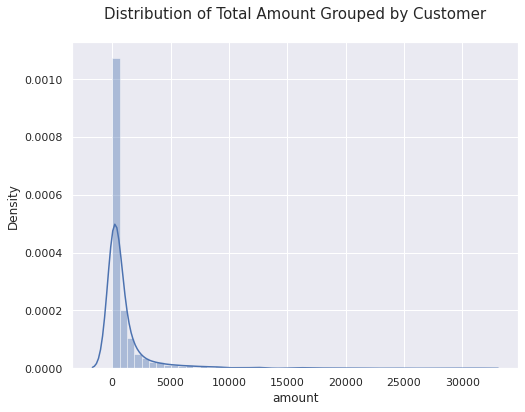

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(gby_ownerid)
plt.title("Distribution of Total Amount Grouped by Customer\n", fontsize = 15)
plt.show()

In [ ]:
df = df[df["ownerid"] != "b6ed3bef-0f78-4749-98e9-a6f1cc6ae177"]
#df = df[df["ownerid"] != "8988f208-b453-4302-9d72-420d36ed580f"]
#df = df[df["ownerid"] != "af0e4d22-7d04-4f84-88c5-4a6c1c15fc07"]

In [ ]:
df["amount"].sort_values(ascending=True).head(20)

3827      1.00
35747     9.00
62643    10.00
51537    10.00
45894    10.00
36012    10.00
60159    16.00
16283    16.48
16284    16.48
16285    16.48
16287    16.48
16282    16.48
16288    16.48
16289    16.48
16290    16.48
16291    16.48
16286    16.48
16281    16.48
16279    16.48
16278    16.48
Name: amount, dtype: float64

The numbers less than 16.48 can be misleading amounts and they affect the mean and they will be replaced with median of the amount.

In [ ]:
unknown_amount_list = [0, 1, 9, 10, 16]
                       
df['amount'] = df['amount'].replace(unknown_amount_list, df.amount.median())

df["amount"].sort_values(ascending=True).head(20)

16291    16.48
16289    16.48
16278    16.48
16279    16.48
16280    16.48
16281    16.48
16282    16.48
16283    16.48
16288    16.48
16284    16.48
16285    16.48
16286    16.48
16287    16.48
16290    16.48
54626    17.50
54622    17.50
2502     17.50
2505     17.50
2904     17.75
2931     17.75
Name: amount, dtype: float64

In [ ]:
gby_ownerid2 = df.groupby("ownerid")["amount"].sum().sort_values(ascending=False)
gby_ownerid2

ownerid
eea120c4-6c99-4c83-8251-1ea3d1e89dd3    23992.080000
f82cb910-9213-49f4-98ec-ce3347328c9a    21524.990000
ea27cea2-0876-41bc-b8e8-5af5402b34a7    20674.215037
7ebb85b5-8d08-40b5-a334-0d32fd9b7be2    19432.000000
988ac167-f1d5-4d6f-b961-94c5b5de3e20    19238.780000
                                            ...     
e8b91196-9134-47b0-8785-abad1817f024       25.000000
fde60302-0033-4e69-ac93-80cc1fd2fda4       23.920000
a4966af8-31c3-4b80-92b5-eee0613a9241       23.920000
605d3444-bb0d-4711-965b-a1f152ff4680       20.000000
105c946a-64b5-4e6e-adcd-c17543df6f48       19.790000
Name: amount, Length: 1557, dtype: float64

In [ ]:
gby_ownerid2.describe()

count     1557.000000
mean      1068.534103
std       2361.804021
min         19.790000
25%         59.900000
50%        274.500000
75%        930.950000
max      23992.080000
Name: amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


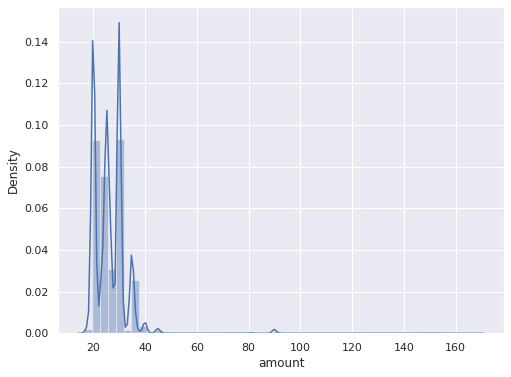

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df["amount"])
plt.show()

As a result of changes, the standart deviation was reduced. 

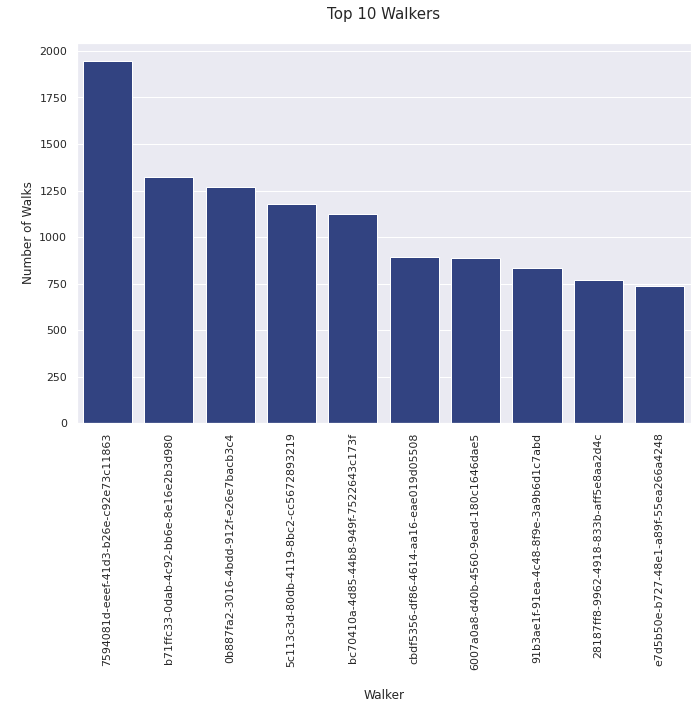

In [ ]:
walker_first10 = df["walkerid"].value_counts(sort= True).head(10)
walker_first10 = pd.DataFrame(walker_first10)
walker_first10 = walker_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "walkerid", data= walker_first10, color='#253B8E')
plt.xlabel("\nWalker")
plt.ylabel("\nNumber of Walks")
plt.title("Top 10 Walkers\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

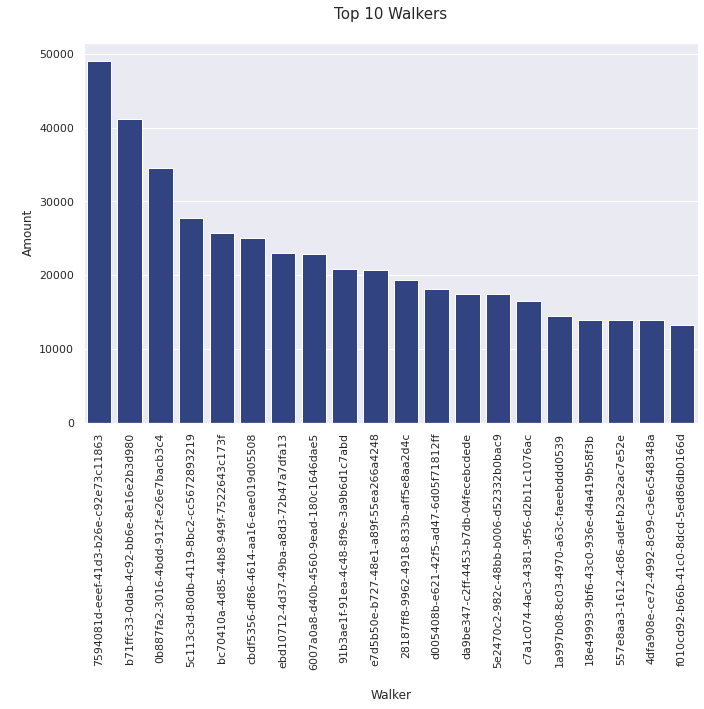

In [ ]:
amount_walker = df.groupby("walkerid")["amount"].sum().sort_values(ascending=False)
amount_walker20 = amount_walker.head(20)

amount_walker20 = pd.DataFrame(amount_walker20)
amount_walker20 = amount_walker20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "walkerid", y= "amount", data= amount_walker20, color='#253B8E')
plt.xlabel("\nWalker")
plt.ylabel("\nAmount")
plt.title("Top 10 Walkers\n", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

A similar investigation was done for the top ten walkers, but there is no abnormal case.

In [ ]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_plot(feature, df, colors='Blues_d', hue=False,):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This algo sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)   
    plt.show()

In [ ]:
sorted_walkingtype = df.walkingtype.sort_values(ascending=False)
df["sorted_walkingtype"] = sorted_walkingtype

<Figure size 720x576 with 0 Axes>

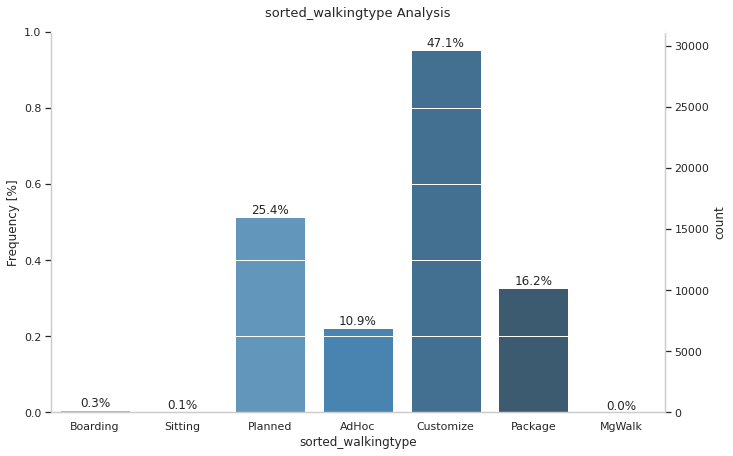

In [ ]:
plt.figure(figsize=(10, 8))
count_plot(feature="sorted_walkingtype", df=df)

According to walking type analysis, almost half of all transactions are customize walking which generated by customers based on their schedules or choises. Planned walking is second and it means 25% walks were scheduled before the walking, but this category includes only single walks.

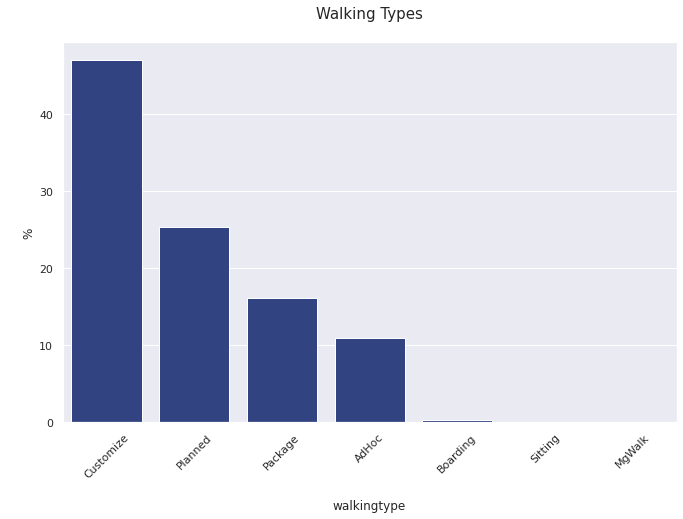

In [ ]:
perc_walkingtype = df["walkingtype"].value_counts()/len(df["walkingtype"])*100
perc_walkingtype20 = perc_walkingtype.head(20)

perc_walkingtype20 = pd.DataFrame(perc_walkingtype20)
perc_walkingtype20 = perc_walkingtype20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "walkingtype", data= perc_walkingtype20, color='#253B8E')
plt.xlabel("\nwalkingtype")
plt.ylabel("\n%")
plt.title("Walking Types\n", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

Walk group is related to dog types, and dog types are defined according to dogs' weight. There is no significant difference between these three categories.

In [ ]:
perc_district = df["district"].value_counts()/len(df["district"])*100
perc_district20 = perc_district.head(20)

perc_district20 = pd.DataFrame(perc_district20)
perc_district20 = perc_district20.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "district", data= perc_district20)
plt.xlabel("\ndistrict")
plt.ylabel("\n%")
plt.title("Top 10 districts\n", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

In the top ten districts, Kadıköy is the number one, and there is a significant difference. The district variable can be used as a supporting variable of rfm in the following step to separate customer groups. On the other hand, another customer segmentation can be done for Kadiköy particularly.

In [ ]:
perc_paymenttype = df["paymenttype"].value_counts()/len(df["paymenttype"])*100

perc_paymenttype = pd.DataFrame(perc_paymenttype)
perc_paymenttype = perc_paymenttype.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "paymenttype", data= perc_paymenttype)
plt.xlabel("\npaymenttype")
plt.ylabel("\n%")
plt.title("paymenttype\n", fontsize = 15)
plt.xticks(rotation=20)
plt.show()

Paymenttype variable consists of almost paid walkings.

In [ ]:
perc_paymentstatus = df[df["paymentstatus"] == "Free"]
nof_free = len(perc_paymentstatus)

perc_paymentstatus = df[df["paymentstatus"] == "Approved"]
nof_paid= len(perc_paymentstatus)
print('Free: {} and Approved:"{}"'.format(nof_free, nof_paid))

##RFM

Two walk statuses are finished and canceled. Finished walks are used to calculate RFM because canceled walks are not proper transactions.

In [ ]:
df= df[df["walkstatus"] == "Finished"]

### Preprocessing

There are some problematic rows in checkintime and ordercreatedtime such as check in time is not recent than order created time. Order creation is previous step of check in. Therefore, a new column is generated and latest date is selected from them.

In [ ]:
df['checkin_revized'] = np.where(df['checkintime'] >= df['ordercreatedtime'], df['checkintime'], df['ordercreatedtime'])

In [ ]:
df['checkin_revized'].sort_values(ascending=False)

In [ ]:
#df['checkin_revized'] = df["checkintime"]

In [ ]:
df['checkin_revized'] = df['checkin_revized'].dt.normalize()

In [ ]:
df.checkin_revized.sort_values(ascending=False).head(10)

### Generating RFM and Tenure Columns

RFM and tenure columns are generated using the part from the last year.

In [ ]:
print("Min:{}; Max:{}".format(min(df.checkin_revized), max(df.checkin_revized)))


In [ ]:
'''import datetime

start_date = pd.to_datetime('today')
start_date'''


In [ ]:
import datetime

start_date = max(df.checkin_revized)
start_date

In [ ]:
end_date = start_date - datetime.timedelta(days=365)
end_date

In [ ]:
mask = (df['checkin_revized'] > end_date) & (df['checkin_revized'] <= start_date)

In [ ]:
df_lastyear = df.loc[mask]

In [ ]:
snapshot_date = start_date + datetime.timedelta(days=1)
snapshot_date

In [ ]:
datamart =  df_lastyear.groupby(["ownerid"]).agg({"checkin_revized": lambda x: (snapshot_date - x.max()).days,
                                         "checkintime": "count",
                                         "amount": "sum"})

In [ ]:
datamart.head()

In [ ]:
datamart.rename(columns={"checkintime": "Frequency",
                         "checkin_revized": "Recency",
                         "amount": "MonetaryValue"}, inplace=True)

In [ ]:
datamart_tenure = df.groupby(["ownerid"]).agg({"checkin_revized": lambda x: (snapshot_date - x.min()).days})

In [ ]:
datamart = pd.merge(datamart, datamart_tenure, left_on="ownerid", right_on="ownerid", how='left')

In [ ]:
datamart.head()

In [ ]:
datamart.rename(columns={"checkin_revized": "Tenure"}, inplace=True)

In [ ]:
datamart.head()

In [ ]:
datamart.describe()

Frequency and monetary are highly correlated, so frequency is excluded from RFM analysis. The analyses are completed using Recency, Monetary and Tenure features.

In [ ]:
heatmap_all = sns.heatmap(datamart.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
datamart = datamart.drop("Frequency", axis=1)

##K-means

### Normalization

Recency, Monetary and Tenure features are tried to normalise using four different transformation methods: square root, reciprocal, log, and boxcox one by one. All process failed, but the nearest values to normal distribution are obtained thanks to boxcox method.

In [ ]:
sns.distplot(datamart["Recency"])
plt.show()

In [ ]:
sns.distplot(datamart["MonetaryValue"])
plt.show()

In [ ]:
sns.distplot(datamart["Tenure"])
plt.show()

In [ ]:
from scipy import stats

shapiro_Recency= stats.shapiro(datamart.Recency)

shapiro_MonetaryValue= stats.shapiro(datamart.MonetaryValue)

shapiro_Tenure= stats.shapiro(datamart.Tenure)

print("Shapiro Score of Recency: {}".format(shapiro_Recency))
print("Shapiro Score of MonetaryValue: {}".format(shapiro_MonetaryValue))
print("Shapiro Score of Tenure: {}".format(shapiro_Tenure))

In [ ]:
from scipy.stats import normaltest
k2, p = normaltest(datamart.Tenure)
print(p)

In [ ]:
datamart_log = np.log(datamart)

plt.subplot(3,1,1) ; sns.distplot(datamart_log["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_log["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_log["Tenure"])


In [ ]:
from scipy import stats

shapiro_Recency_log= stats.shapiro(datamart_log.Recency)

shapiro_MonetaryValue_log= stats.shapiro(datamart_log.MonetaryValue)

shapiro_Tenure_log= stats.shapiro(datamart_log.Tenure)

print("Shapiro Score of Recency: {}".format(shapiro_Recency_log))
print("Shapiro Score of MonetaryValue: {}".format(shapiro_MonetaryValue_log))
print("Shapiro Score of Tenure: {}".format(shapiro_Tenure_log))

In [ ]:
datamart_sqrt = (datamart)**(0.5)

plt.subplot(3,1,1) ; sns.distplot(datamart_sqrt["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_sqrt["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_sqrt["Tenure"])

In [ ]:
from scipy import stats
print(stats.shapiro(datamart_sqrt["Recency"]))
print(stats.shapiro(datamart_sqrt["MonetaryValue"]))
print(stats.shapiro(datamart_sqrt["Tenure"]))

In [ ]:
datamart_recip = 1/datamart

plt.subplot(3,1,1) ; sns.distplot(datamart_recip["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_recip["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_recip["Tenure"])

In [ ]:
from scipy import stats
print(stats.shapiro(datamart_recip["Recency"]))
print(stats.shapiro(datamart_recip["MonetaryValue"]))
print(stats.shapiro(datamart_recip["Tenure"]))

In [ ]:
datamart_boxcox = datamart.copy()
from scipy.stats import boxcox
for i in datamart_boxcox:
  datamart_boxcox[i], lmbda = boxcox(datamart_boxcox[i], lmbda=None)

plt.subplot(3,1,1) ; sns.distplot(datamart_boxcox["Recency"])

plt.subplot(3,1,2) ; sns.distplot(datamart_boxcox["MonetaryValue"])

plt.subplot(3,1,3) ; sns.distplot(datamart_boxcox["Tenure"])

In [ ]:
from scipy import stats
print(stats.shapiro(datamart_boxcox["Recency"]))
print(stats.shapiro(datamart_boxcox["MonetaryValue"]))
print(stats.shapiro(datamart_boxcox["Tenure"]))

### *Scaling the Data*

Minmax scaler and Robust scaler are used to scale the data, and Minmax scaler gives better results.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(datamart_boxcox)

In [ ]:
datamart_normalized = scaler.transform(datamart_boxcox)

In [ ]:
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart.index, columns=datamart.columns)

In [ ]:
datamart_normalized.head()

In [ ]:
heatmap = sns.heatmap(datamart_normalized.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
print(datamart_normalized.describe().round(2))

### Application of K-means

#### The Elbow Method

Firstly, the elbow method is applied with 10 options which are from 1 to 10. 3 seems like a good option, but the silhouette score graph can be clearer to determine the number of clusters.

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,26):
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
  kmeans.fit(datamart_normalized)
  sse[k] = kmeans.inertia_

plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
 
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
 
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
 
    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):
 
        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1)
        labels = kmeans.fit_predict(dataset)
 
        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
 
        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
 
        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters,
            silhouette_avg,
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))
 
        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(6.47,3))
 
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

#### Silhouette Score 

A silhouette score graph is plotted, and it includes the cluster numbers from 2 to 10. There is a peak on 5, and the graph slightly increases on 7, 8 and 10. 5, 7, 8, and 10 are determined as important clusters for this project, and they are check by visualizing on different plots.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
optimal_kmeans(datamart_normalized, start=2, end=26)

#### Application of PCA to Convert from 3D to 2D

Clustering is carried out with 8 clusters using K-means algorithm as the first trial, and its results are plotted on two dimensions. PCA is used to convert from 3 to 2 dimensions.

In [ ]:
def kmeans_pca(df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=1)
  datamart_k8_stat = kmeans.fit(df)

  labels = kmeans.labels_
  centers= kmeans.cluster_centers_
  clusters= kmeans.predict(df)

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(df)

  datamart_pca = pca.transform(df)

  datamart_pca = pd.DataFrame(datamart_pca, columns=["PCA1", "PCA2"])
  datamart_pca["Clusters"] = clusters

  pca.fit(centers)
  centers_pca = pca.transform(centers)

  colors = ["#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04", "#4374B3","#FF0B04"]
  custompalette = sns.set_palette(sns.color_palette(colors))

  plt.figure(figsize=(14,10))
  sns.scatterplot(datamart_pca["PCA1"], datamart_pca["PCA2"], hue=clusters, s=25, palette="brg")
  sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1], marker="o", s=200, alpha=0.8);

  plt.xlabel("PCA1")
  plt.ylabel("PCA2")

  plt.show()

In [ ]:
kmeans_pca(datamart_normalized, 8)

In [ ]:
kmeans = KMeans(n_clusters=8, n_init=20, random_state=1)
datamart_k8_stat = kmeans.fit(datamart_normalized)

In [ ]:
labels = kmeans.labels_
centers= kmeans.cluster_centers_
clusters= kmeans.predict(datamart_normalized)

In [ ]:
centers.shape

In [ ]:
datamart_normalized.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(datamart_normalized)

In [ ]:
datamart_pca = pca.transform(datamart_normalized)
datamart_pca.shape

In [ ]:
datamart_pca = pd.DataFrame(datamart_pca, columns=["PCA1", "PCA2"])

In [ ]:
datamart_pca["Clusters"] = clusters

In [ ]:
datamart_pca

In [ ]:
pca.fit(centers)
centers_pca = pca.transform(centers)
centers_pca.shape

In [ ]:
'''datamart_normalized_centers = datamart_normalized
datamart_normalized_centers['cluster'] = clusters

# get centroids
cen_x = [i[0] for i in centers] 
cen_y = [i[1] for i in centers]

## add to datamart_normalized
datamart_normalized_centers['cen_x'] = datamart_normalized_centers.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
datamart_normalized_centers['cen_y'] = datamart_normalized_centers.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})'''

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(datamart_pca["PCA1"], datamart_pca["PCA2"], hue=clusters, s=25, palette="brg")
sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1], marker="o", s=200, alpha=0.8);

plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.show()

In [ ]:
'''plt.figure(figsize=(14,10))

plt.scatter(datamart_pca[datamart_pca["Clusters"] == 0].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 0].loc[:, "PCA2"], color="red")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 1].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 1].loc[:, "PCA2"], color="blue")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 2].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 2].loc[:, "PCA2"], color="cyan")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 3].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 3].loc[:, "PCA2"], color="yellow")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 4].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 4].loc[:, "PCA2"], color="green")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 5].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 5].loc[:, "PCA2"], color="black")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 6].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 6].loc[:, "PCA2"], color="white")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 7].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 7].loc[:, "PCA2"], color="purple")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 8].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 8].loc[:, "PCA2"], color="yellow")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 9].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 9].loc[:, "PCA2"], color="green")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 10].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 10].loc[:, "PCA2"], color="red")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 11].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 11].loc[:, "PCA2"], color="blue")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 12].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 12].loc[:, "PCA2"], color="cyan")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 13].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 13].loc[:, "PCA2"], color="yellow")
plt.scatter(datamart_pca[datamart_pca["Clusters"] == 14].loc[:, "PCA1"], datamart_pca[datamart_pca["Clusters"] == 14].loc[:, "PCA2"], color="green")

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker="x", s=200, alpha=0.8)

plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.show()'''

In [ ]:
datamart_normalized

#### Pair Plots

Different pairs are plotted to understand the differences of clusters such as tenure with recency or recency with monetary.

In [ ]:
datamart_normalized_multiple = datamart_normalized.copy()

In [ ]:
# k means
kmeans = KMeans(n_clusters=8, random_state=0)
datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Recency', 'MonetaryValue']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to datamart_normalized_multiple
datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_x[7]})

datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_y[7]})

# define and map colors
colors = ['#DF2020', '#00756F', '#005DFF', '#060000', '#FF33FF', '#2EFF00', '#E8FF00', "#000000", "#FF00FF", "#000000", "#FFA07A", "#F08080", "#5F1E1E", "#FF9E00", "#5C395C"]

datamart_normalized_multiple['c'] = datamart_normalized_multiple.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6],
                                                                              7:colors[7]})

#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(14,14))
# plot data
plt.scatter(datamart_normalized_multiple.Recency, datamart_normalized_multiple.MonetaryValue, c=datamart_normalized_multiple.c, alpha = 0.6, s=10)

plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('\nRecency - MonetaryValue\n', loc='left', fontsize=22)
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')


In [ ]:
# k means
kmeans = KMeans(n_clusters=8, random_state=0)
datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Tenure', 'MonetaryValue']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to datamart_normalized_multiple
datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_x[7]})

datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_y[7]})

# define and map colors
colors = ['#DF2020', '#00756F', '#005DFF', '#060000', '#FF33FF', '#2EFF00', '#E8FF00', "#000000", "#FF00FF", "#000000", "#FFA07A", "#F08080", "#5F1E1E", "#FF9E00", "#5C395C"]

datamart_normalized_multiple['c'] = datamart_normalized_multiple.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6],
                                                                              7:colors[7]})

#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(14,14))
# plot data
plt.scatter(datamart_normalized_multiple.Tenure, datamart_normalized_multiple.MonetaryValue, c=datamart_normalized_multiple.c, alpha = 0.6, s=10)

plt.scatter(cen_x, cen_y, marker='^', c="black", s=70, alpha=0.5)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('\nTenure - MonetaryValue\n', loc='left', fontsize=22)
plt.xlabel('Tenure')
plt.ylabel('MonetaryValue')

In [ ]:
# k means
kmeans = KMeans(n_clusters=8, random_state=0)
datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Tenure', 'Recency']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to datamart_normalized_multiple
datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_x[7]})

datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                                                                  7:cen_y[7]})

# define and map colors
colors = ['#DF2020', '#00756F', '#005DFF', '#060000', '#FF33FF', '#2EFF00', '#E8FF00', "#000000", "#FF00FF", "#000000", "#FFA07A", "#F08080", "#5F1E1E", "#FF9E00", "#5C395C"]

datamart_normalized_multiple['c'] = datamart_normalized_multiple.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6],
                                                                              7:colors[7]})

#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(14,14))
# plot data
plt.scatter(datamart_normalized_multiple.Tenure, datamart_normalized_multiple.Recency, c=datamart_normalized_multiple.c, alpha = 0.6, s=10)

plt.scatter(cen_x, cen_y, marker='^', c="black", s=70, alpha=0.5)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('\nTenure - Recency\n', loc='left', fontsize=22)
plt.xlabel('Tenure')
plt.ylabel('Recency')

In [ ]:
datamart_normalized

#### Visualization of Important Cluster Numbers

PCA method and pair plots are applied for all important cluster numbers.

In [ ]:
important_clusters = [3, 8, 11, 15]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
  datamart_k = kmeans.fit(datamart_normalized)

  centers= kmeans.cluster_centers_
  clusters= kmeans.predict(datamart_normalized)

  from sklearn.decomposition import PCA
  pca = PCA(n_components=2, random_state=1)
  pca.fit(datamart_normalized)

  datamart_pca = pca.transform(datamart_normalized)
 

  datamart_pca = pd.DataFrame(datamart_pca, columns=["PCA1", "PCA2"])
  datamart_pca["Clusters"] = clusters

  pca.fit(centers)
  centers_pca = pca.transform(centers)
  

  plt.figure(figsize=(10,120))
  plt.subplot(15,1,i)
  plt.scatter(datamart_pca["PCA1"], datamart_pca["PCA2"], c=clusters, s=25, cmap='brg')
  plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', marker="o", s=200, alpha=0.8)


  plt.title('Number of Clusters: {}'.format(i))

In [ ]:
# k means
important_clusters = [3, 8, 11, 15]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Recency', 'MonetaryValue']])
  clusters= kmeans.predict(datamart_normalized[['Recency', 'MonetaryValue']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to datamart_normalized_multiple
  datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,120))
  plt.subplot(15,1,i)

  plt.scatter(datamart_normalized_multiple.Recency, datamart_normalized_multiple.MonetaryValue, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nRecency - MonetaryValue\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Recency')
  plt.ylabel('MonetaryValue')



In [ ]:
# k means
important_clusters = [3, 8, 11, 15]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Tenure', 'MonetaryValue']])
  clusters= kmeans.predict(datamart_normalized[['Tenure', 'MonetaryValue']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to datamart_normalized_multiple
  datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,120))
  plt.subplot(15,1,i)

  plt.scatter(datamart_normalized_multiple.Tenure, datamart_normalized_multiple.MonetaryValue, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nTenure - MonetaryValue\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Tenure')
  plt.ylabel('MonetaryValue')

In [ ]:
# k means
important_clusters = [3, 8, 11, 15]
for i in important_clusters:
  kmeans = KMeans(n_clusters=i, random_state=1)
  datamart_normalized_multiple['cluster'] = kmeans.fit_predict(datamart_normalized[['Tenure', 'Recency']])
  clusters= kmeans.predict(datamart_normalized[['Tenure', 'Recency']])

  # get centroids
  centroids = kmeans.cluster_centers_
  cen_x = [j[0] for j in centroids] 
  cen_y = [j[1] for j in centroids]

  ## add to datamart_normalized_multiple
  datamart_normalized_multiple['cen_x'] = datamart_normalized_multiple.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
  datamart_normalized_multiple['cen_y'] = datamart_normalized_multiple.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

  #####PLOT#####
  plt.figure(figsize=(10,120))
  plt.subplot(15,1,i)

  plt.scatter(datamart_normalized_multiple.Tenure, datamart_normalized_multiple.Recency, c=clusters, cmap="brg", alpha = 0.6, s=10)
  
  plt.scatter(cen_x, cen_y, marker='^', c="black", s=100, alpha=0.5)
 
  # title and labels
  plt.title('\nTenure - Recency\nNumber of Clusters: {}'.format(i))
  plt.xlabel('Tenure')
  plt.ylabel('Recency')

#### Descriptive Analysis of K-means Clusters

Statistical values and snake plots are generated to help to determine labels of clusters.

In [ ]:
datamart_k8_stat = datamart.assign(Cluster = labels)

In [ ]:
datamart_k8_stat.groupby(["Cluster"]).agg({
    "Recency": ["mean", "std"],
    "MonetaryValue": ["mean", "std"],
    "Tenure": ["mean", "std", "count"],
}).round(0)

In [ ]:
datamart_normalized_k8 = datamart_normalized.copy()

In [ ]:
datamart_normalized_k8["Cluster"] = datamart_k8_stat["Cluster"]

In [ ]:
datamart_melt = pd.melt(datamart_normalized_k8.reset_index(),
                        id_vars= ["ownerid", "Cluster"],
                        value_vars= ["Recency", "MonetaryValue", "Tenure"],
                        var_name= "Attribute",
                        value_name= "Value") 

In [ ]:
plt.title("Snake Plot of Standardized Variables")
sns.lineplot(x="Attribute", y="Value", hue="Cluster", data=datamart_melt)

In [ ]:
  important_clusters = [3, 8, 11, 15]
  for i in important_clusters:
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    datamart_k = kmeans.fit(datamart_normalized)

    labels = kmeans.labels_
    centers= kmeans.cluster_centers_
    clusters= kmeans.predict(datamart_normalized)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, random_state=1)
    pca.fit(datamart_normalized)

    datamart_pca = pca.transform(datamart_normalized)

    datamart_pca = pd.DataFrame(datamart_pca, columns=["PCA1", "PCA2"])
    datamart_pca["Clusters"] = clusters

    pca.fit(centers)
    centers_pca = pca.transform(centers)

    plt.figure(figsize=(14,10))
    sns.scatterplot(datamart_pca["PCA1"], datamart_pca["PCA2"], hue=clusters, s=25, palette="brg")
    sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1], marker="o", s=200, alpha=0.8);

    plt.xlabel("PCA1")
    plt.ylabel("PCA2")

    plt.show()

    datamart_k = datamart.assign(Cluster = labels)

    datamart_summary = datamart_k.groupby(["Cluster"]).agg({
      "Recency": ["mean", "std"],
      "MonetaryValue": ["mean", "std", "max",],
      "Tenure": ["mean", "std", "count"],
    }).round(0)

    print('\t\t\tNumber of Cluster {}\n'.format(i))
    print(datamart_summary)
    print("\n")

#### Determination of Cluster Labels

After a plenty of trials, cluster labels are determined based on the visualizations above and statistical values.

##### The Labels of Clusters for 3

*   Cluster 0: VIP
*   Cluster 1: Churn
*   Cluster 2: Newcomers

##### The Labels of Clusters for 8

*   Cluster 0: VIP             (LR-HM-HT)
*   Cluster 1: Newest Passive  (HR-LM-LT)
*   Cluster 2: Most Expensive Churn   (HR-HM-HT)
*   Cluster 3: Just First Walk (HR-LM-HT)
*   Cluster 4: Newcomers       (LR-LM-LT)
*   Cluster 5: New VIP         (LR-HM-LT)
*   Cluster 6: Old Passive     (HR-LM-HM)
*   Cluster 7: New Passive     (HR-LM-LT)

##### The Labels of Clusters for 15

*   Cluster 0: New Passive -M-M (AC)
*   Cluster 1: VIP
*   Cluster 2: Newest VIP
*   Cluster 3: Just First Walk (C)
*   Cluster 4: Most Expensive Churn (C)
*   Cluster 5: New VIP Candidate
*   Cluster 6: Expensive Churn (C)
*   Cluster 7: New Just a few walks (AC)
*   Cluster 8: New VIP
*   Cluster 9: Old active -M
*   Cluster 10: VIP -R
*   Cluster 11: Old Passive -M-M-M (AC)
*   Cluster 12: Newest
*   Cluster 13: Just a few walks +M (C)
*   Cluster 14: Just a few walks +T (C)


### Distance to Cluster Center

There are some different approaches to comparing distance. In this chapter, all distances are calculated for each cluster points to cluster centroids. Because of that, the smallest distance and sum of squared distance are used for this analysis.

In [ ]:
kmeans = KMeans(n_clusters=8, n_init=20, random_state=1)
datamart_k = kmeans.fit(datamart_normalized)

labels = kmeans.labels_
centers= kmeans.cluster_centers_
centroids= kmeans.predict(datamart_normalized)

In [ ]:
#Distance to cluster center
X_dist = kmeans.transform(datamart_normalized)

X_dist

In [ ]:
df_dist = pd.DataFrame(X_dist)
df_dist['Cluster'] = centroids
df_dist

In [ ]:
X_dist_min = X_dist.min(1)
X_dist_min

In [ ]:
'''# squared distance to cluster center
X_sqdist = kmeans.transform(datamart_normalized)**2


import pandas as pd
df_dist_min = pd.DataFrame(X_dist_min.sum(axis=1).round(2), columns=['sqdist'])
df_dist_min['label'] = centroids

df_dist_min.head(10)'''

In [ ]:
sum_sq_dist = X_dist.sum(axis=1).round(2)

In [ ]:
datamart_k8_dist = datamart_k8_stat.assign(MinDistance = X_dist_min)
datamart_k8_dist

In [ ]:
df_dist = df_dist.assign(MinDistance = X_dist_min)
df_dist

In [ ]:
datamart_k8_dist = datamart_k8_dist.assign(SumofSquareDistance = sum_sq_dist)
datamart_k8_dist = datamart_k8_dist.reset_index()
datamart_k8_dist

In [ ]:
df_k8_dist = pd.merge(datamart_k8_dist, df_dist.drop_duplicates("MinDistance"), left_on="MinDistance", right_on="MinDistance", how="left")
df_k8_dist.sort_values("MinDistance")

In [ ]:
df_k8_dist = df_k8_dist.drop("Cluster_y", axis=1)
df_k8_dist = df_k8_dist.rename(columns={"Cluster_x": "Cluster"})
df_k8_dist

In [ ]:
'''from google.colab import files
datamart_k8_dist.to_csv('DogGo_CS_k8_dist.csv') 
files.download('DogGo_CS_k8_dist.csv')'''

First five customers that has smallest distance for each cluster are listed below.

In [ ]:
for i in range(8):
  print(df_k8_dist[df_k8_dist["Cluster"] == i].sort_values(["MinDistance"]).head(5))

##### Distance Matrix of Centroids

In [ ]:
centers

In [ ]:
df_dist_centers = pd.DataFrame(centers, columns=['xcord', 'ycord', 'zcord'])

In [ ]:
from scipy.spatial import distance_matrix
df_dist_matrix_centers = pd.DataFrame(distance_matrix(df_dist_centers.values, df_dist_centers.values), index=df_dist_centers.index, columns=df_dist_centers.index)

In [ ]:
df_dist_matrix_centers

###Analysis of Similarity

To ensure each customer is in the correct cluster, the similarity between each point in a cluster. It can be helpful to realize a wrong cluster point. As a first step similarity function is generated. Next, similarities are calculated for each cluster and some statistical features are calculated to . Similarity heat maps are plotted to visualize these analyses.

In [ ]:
import math

from matplotlib import pyplot as plt
import numpy as np
import numpy.linalg as nla
import pandas as pd
import seaborn as sns
import altair as alt
import re
import pdb  # for Python debugger
import sys
from os.path import join

In [ ]:
datamart_normalized_tf = datamart_normalized.copy()
datamart_normalized_tf = datamart_normalized_tf.reset_index()
datamart_normalized_tf = datamart_normalized_tf.drop("ownerid", axis=1)
datamart_normalized_tf2 = datamart_normalized_tf.copy()
datamart_normalized_tf2


In [ ]:
def getSimilarity(obj1, obj2):
  len1 = len(obj1.index)
  len2 = len(obj2.index)
  if not (len1 == len2):
    print ("Error: Compared objects must have same number of features.")
    sys.exit()
    return 0
  else:
    similarity = obj1 - obj2
    similarity = np.sum((similarity**2.0) / 10)
    similarity = 1 - math.sqrt(similarity)
    return similarity

In [ ]:
datamart_tf = datamart.copy()
datamart_tf = datamart_tf.reset_index()
datamart_tf = datamart_tf.drop("ownerid", axis=1)

In [ ]:
def similarityHeatMapStats(df, cluster_number):
  datamart_sim = df.copy()
  datamart_sim["Cluster"] = centroids
  datamart_sim = datamart_sim.reset_index()
  datamart_sim = datamart_sim.drop("ownerid", axis=1)
  datamart_sim_c = datamart_sim[datamart_sim["Cluster"] == cluster_number]
  datamart_sim_c = datamart_sim_c.drop("Cluster", axis=1)
  datamart_sim_c = datamart_sim_c.reset_index()
  datamart_sim_c = datamart_sim_c.drop("index", axis=1)
  datamart_sim_c

  mat2 = []
  owner1 = 0
  ownersToCompare = [0, len(datamart_sim_c)-1]
  for ij in range(ownersToCompare[0], ownersToCompare[1] + 1):
    for ii in range(ownersToCompare[0], ownersToCompare[1] + 1):
      mat2.append(getSimilarity(datamart_sim_c.loc[ij], datamart_sim_c.loc[ii]))

  Yrows = []
  for i in range(1,len(datamart_sim_c)+1):
    for j in range(1,len(datamart_sim_c)+1):
      Yrows.append(i)

  Xcols = []
  for i in range(1,len(datamart_sim_c)+1):
    for j in range(1,len(datamart_sim_c)+1):
      Xcols.append(j)

  df_mat = pd.DataFrame(mat2, columns=["M"])
  df_mat["Yrows"] = Yrows
  df_mat["Xcols"] = Xcols
  df_mat.sort_values("M")

  matrix = ((np.asarray(df_mat["M"])).reshape(len(datamart_sim_c), len(datamart_sim_c)))
  matrix_xcols = ((np.asarray(df_mat["Xcols"])).reshape(len(datamart_sim_c), len(datamart_sim_c)))

  result = df_mat.pivot(index="Yrows", columns="Xcols", values="M")

  labels = (np.asarray(["{0} \n {1:.2f}".format(symb, value) for symb, value in zip(matrix_xcols.flatten(), matrix.flatten())])).reshape(len(datamart_sim_c), len(datamart_sim_c))

  '''fig, ax = plt.subplots(figsize=(120,90))

  title = "Similarity Heat Map"

  plt.title(title, fontsize=60)
  ttl = ax.title
  ttl.set_position([0.5,1.05])

  ax.set_xticks([])
  ax.set_yticks([])

  ax.axis("off")

  sns.heatmap(result, annot=labels, fmt="", cmap="RdYlGn", linewidths=0.30, ax=ax)

  plt.show()'''

  print("Cluster: ", cluster_number)
  print("Max value: ", max(mat2))
  print("Min value: ", min(mat2))
  print("Mean value: ", statistics.mean(mat2))
  print("Mode value: ", statistics.mode(mat2))
  print("Number of elements: ", len(datamart_sim_c))
  print("\n")

In [ ]:
for i in range(0, 8):
  similarityHeatMapStats(datamart_normalized, i)

Within these 7 gruops, the best cluster is cluster 2, because it has higher mean value. The worst cluster is 3 that has lowest mean and min value.

In [ ]:
def similarityHeatMap(df, cluster_number):
  datamart_sim = df.copy()
  datamart_sim["Cluster"] = centroids
  datamart_sim = datamart_sim.reset_index()
  datamart_sim = datamart_sim.drop("ownerid", axis=1)
  datamart_sim_c = datamart_sim[datamart_sim["Cluster"] == cluster_number]
  datamart_sim_c = datamart_sim_c.drop("Cluster", axis=1)
  datamart_sim_c = datamart_sim_c.reset_index()
  datamart_sim_c = datamart_sim_c.drop("index", axis=1)
  datamart_sim_c

  mat2 = []
  owner1 = 0
  ownersToCompare = [0, len(datamart_sim_c)-1]
  for ij in range(ownersToCompare[0], ownersToCompare[1] + 1):
    for ii in range(ownersToCompare[0], ownersToCompare[1] + 1):
      mat2.append(getSimilarity(datamart_sim_c.loc[ij], datamart_sim_c.loc[ii]))

  Yrows = []
  for i in range(1,len(datamart_sim_c)+1):
    for j in range(1,len(datamart_sim_c)+1):
      Yrows.append(i)

  Xcols = []
  for i in range(1,len(datamart_sim_c)+1):
    for j in range(1,len(datamart_sim_c)+1):
      Xcols.append(j)

  df_mat = pd.DataFrame(mat2, columns=["M"])
  df_mat["Yrows"] = Yrows
  df_mat["Xcols"] = Xcols
  df_mat.sort_values("M")

  matrix = ((np.asarray(df_mat["M"])).reshape(len(datamart_sim_c), len(datamart_sim_c)))
  matrix_xcols = ((np.asarray(df_mat["Xcols"])).reshape(len(datamart_sim_c), len(datamart_sim_c)))

  result = df_mat.pivot(index="Yrows", columns="Xcols", values="M")

  labels = (np.asarray(["{0} \n {1:.2f}".format(symb, value) for symb, value in zip(matrix_xcols.flatten(), matrix.flatten())])).reshape(len(datamart_sim_c), len(datamart_sim_c))

  fig, ax = plt.subplots(figsize=(90,60))

  title = "Similarity Heat Map"

  plt.title(title, fontsize=60)
  ttl = ax.title
  ttl.set_position([0.5,1.05])

  ax.set_xticks([])
  ax.set_yticks([])

  ax.axis("off")

  sns.heatmap(result, annot=labels, fmt="", cmap="RdYlGn", linewidths=0.30, ax=ax)

  plt.show()

  print("Cluster: ", cluster_number)
  print("Max value: ", max(mat2))
  print("Min value: ", min(mat2))
  print("Mean value: ", statistics.mean(mat2))
  print("Mode value: ", statistics.mode(mat2))
  print("Number of elements: ", len(datamart_sim_c))
  print("\n")

Similarity Heat Map is plotted for cluster 11 to understand the worst cluster based on similarity.

In [ ]:
similarityHeatMap(datamart_normalized, 6)

In [ ]:
'''datamart_sim = datamart_normalized.copy()
datamart_sim["Cluster"] = centroids
datamart_sim = datamart_sim.reset_index()
datamart_sim = datamart_sim.drop("ownerid", axis=1)
datamart_sim_zero = datamart_sim[datamart_sim["Cluster"] == 1]
datamart_sim_zero = datamart_sim_zero.drop("Cluster", axis=1)
datamart_sim_zero = datamart_sim_zero.reset_index()
datamart_sim_zero = datamart_sim_zero.drop("index", axis=1)
datamart_sim_zero'''


In [ ]:
'''owner1 = 0
ownersToCompare = [1, 4]

print ("Similarity between owners " + str(owner1) + " and ...")

for ii in range(ownersToCompare[0], ownersToCompare[1] + 1):
  print (str(ii) + ": " + str(getSimilarity(datamart_sim_zero.loc[owner1], datamart_sim_zero.loc[ii])))

print ("\n\nFeature data for owner " + str(owner1))
print (datamart_tf.loc[owner1:owner1, :])
print ("\n\nFeature data for compared owners " + str(ownersToCompare))
print (datamart_tf.loc[ownersToCompare[0]:ownersToCompare[1], :])'''

In [ ]:
'''mat0 = []

owner1 = 0
ownersToCompare = [0, 169]
for ij in range(ownersToCompare[0], ownersToCompare[1] + 1):
  mat1=[]
  for ii in range(ownersToCompare[0], ownersToCompare[1] + 1):
    mat1.append(getSimilarity(datamart_sim_zero.loc[ij], datamart_sim_zero.loc[ii]))
  mat0.append(mat1)

print(mat0)'''

In [ ]:
'''plt.imshow(mat0, cmap='hot', interpolation='nearest')
plt.show()'''

In [ ]:
'''mat2 = []
owner1 = 0
ownersToCompare = [0, 169]
for ij in range(ownersToCompare[0], ownersToCompare[1] + 1):
  for ii in range(ownersToCompare[0], ownersToCompare[1] + 1):
    mat2.append(getSimilarity(datamart_sim_zero.loc[ij], datamart_sim_zero.loc[ii]))'''

In [ ]:
'''Yrows = []

for i in range(1,171):
  for j in range(1,171):
    Yrows.append(i)'''

In [ ]:
'''Xcols = []

for i in range(1,171):
  for j in range(1,171):
    Xcols.append(j)''' 

In [ ]:
'''df_mat = pd.DataFrame(mat2, columns=["M"])
df_mat["Yrows"] = Yrows
df_mat["Xcols"] = Xcols
df_mat.sort_values("M")'''

In [ ]:
'''matrix = ((np.asarray(df_mat["M"])).reshape(170, 170))'''

In [ ]:
'''matrix_xcols = ((np.asarray(df_mat["Xcols"])).reshape(170, 170))'''

In [ ]:
#matrix

In [ ]:
#result = df_mat.pivot(index="Yrows", columns="Xcols", values="M")

In [ ]:

#labels = (np.asarray(["{0} \n {1:.2f}".format(symb, value) for symb, value in zip(matrix_xcols.flatten(), matrix.flatten())])).reshape(170, 170)


In [ ]:
'''fig, ax = plt.subplots(figsize=(240,240))

title = "Similarity Heat Map"

plt.title(title, fontsize=180)
ttl = ax.title
ttl.set_position([0.5,1.05])

ax.set_xticks([])
ax.set_yticks([])

ax.axis("off")

sns.heatmap(result, annot=labels, fmt="", cmap="RdYlGn", linewidths=0.30, ax=ax)

plt.show()'''

###Another Application of K-means

In this chapter, k-means is applied like previous chapters, but distance to centroid is defined as loss. Firstly, clusters and distances are calculated and results are shown with some graphs below using related functions.

In [ ]:
datamart_tf

In [ ]:
def dfSimilarity(df, centroids, random_state=1):
  ### dfSimilarity = Calculate similarities for dataframe input
  ### We need to calculate ||a-b||^2 = |a|^2 + |b|^2 - 2*|a|*|b|
  ### Implement this with matrix operations
  ### See the Appendix for further explanation
  numPoints = len(df.index)
  numCentroids = len(centroids.index)
  ## Strictly speaking, we don't need to calculate the norm of points
  # because it adds a constant bias to distances
  # But calculating it so that the similarity doesn't go negative
  # And that we expect similarities in [0,1] which aids debugging
  pointNorms = np.square(nla.norm(df, axis=1))
  pointNorms = np.reshape(pointNorms, [numPoints, 1])
  ## Calculate the norm of centroids
  centroidNorms = np.square(nla.norm(centroids, axis=1))
  centroidNorms = np.reshape(centroidNorms, (1, numCentroids))
  ## Calculate |a|^2 + |b|^2 - 2*|a|*|b|
  similarities = pointNorms + centroidNorms - 2.0 * np.dot(
      df, np.transpose(centroids))
  # Divide by the number of features
  # Which is 10 because the one-hot encoding means the "Maker" and "Bean" are
  # weighted twice
  similarities = similarities / 3.0
  # numerical artifacts lead to negligible but negative values that go to NaN on the root
  similarities = similarities.clip(min=0.0)
  # Square root since it's ||a-b||^2
  similarities = np.sqrt(similarities)
  return similarities


def initCentroids(df, k, feature_cols, random_state=1):
  # Pick 'k' examples are random to serve as initial centroids
  limit = len(df.index)
  centroids_key = np.random.randint(0, limit - 1, k)
  centroids = df.loc[centroids_key, feature_cols].copy(deep=True)
  # the indexes get copied over so reset them
  centroids.reset_index(drop=True, inplace=True)
  return centroids


def pt2centroid(df, centroids, feature_cols, random_state=1):
  ### Calculate similarities between all points and centroids
  ### And assign points to the closest centroid + save that distance
  numCentroids = len(centroids.index)
  numExamples = len(df.index)
  # dfSimilarity = Calculate similarities for dataframe input
  dist = dfSimilarity(df.loc[:, feature_cols], centroids.loc[:, feature_cols])
  df.loc[:, 'centroid'] = np.argmin(dist, axis=1)  # closest centroid
  df.loc[:, 'pt2centroid'] = np.min(dist, axis=1)  # minimum distance
  return df


def recomputeCentroids(df, centroids, feature_cols, random_state=1):
  ### For every centroid, recompute it as an average of the points
  ### assigned to it
  numCentroids = len(centroids.index)
  for cen in range(numCentroids):
    dfSubset = df.loc[df['centroid'] == cen,
                      feature_cols]  # all points for centroid
    if not (dfSubset.empty):  # if there are points assigned to the centroid
      clusterAvg = np.sum(dfSubset) / len(dfSubset.index)
      centroids.loc[cen] = clusterAvg
  return centroids


def kmeans(df, k, feature_cols, verbose, random_state=1):
  flagConvergence = False
  maxIter = 100
  iter = 0  # ensure kmeans doesn't run for ever
  centroids = initCentroids(df, k, feature_cols)
  while not (flagConvergence):
    iter += 1
    #Save old mapping of points to centroids
    oldMapping = df['centroid'].copy(deep=True)
    # Perform k-means
    df = pt2centroid(df, centroids, feature_cols)
    centroids = recomputeCentroids(df, centroids, feature_cols)
    # Check convergence by comparing [oldMapping, newMapping]
    newMapping = df['centroid']
    flagConvergence = all(oldMapping == newMapping)
    if verbose == 1:
      print ('Total distance:' + str(np.sum(df['pt2centroid'])))
    if (iter > maxIter):
      print ('k-means did not converge! Reached maximum iteration limit of ' \
            + str(maxIter) + '.')
      sys.exit()
      return
  print ('k-means converged for ' + str(k) + ' clusters' + \
        ' after ' + str(iter) + ' iterations!')
  return [df, centroids]

In [ ]:
k = 8

feature_cols = datamart_normalized_tf.columns.values  # save original columns
# initialize every point to an impossible value, the k+1 cluster
datamart_normalized_tf['centroid'] = k
# init the point to centroid distance to an impossible value "2" (>1)
datamart_normalized_tf['pt2centroid'] = 2
[datamart_normalized_tf, centroids] = kmeans(datamart_normalized_tf, k, feature_cols, 1)
print("Data for the first few owners, with 'centroid' and 'pt2centroid' on"
      ' the extreme right:')
datamart_normalized_tf.head(10)

K-means is converged for 7 clusters after 13 iterations and clusters and distances are listed.

In [ ]:
def clusterCardinality(df, random_state=1):
  k = np.max(df['centroid']) + 1
  #k = k.astype(float)
  print ('Number of clusters:' + str(k))
  clCard = np.zeros(k)
  for kk in range(k):
    clCard[kk] = np.sum(df['centroid'] == kk)
  clCard = clCard.astype(float)
  # print "Cluster Cardinality:"+str(clCard)
  plt.figure()
  plt.bar(range(k), clCard)
  plt.title('Cluster Cardinality')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Points in Cluster')
  return clCard


def clusterMagnitude(df, random_state=1):
  k = np.max(df['centroid']) + 1
  #k = k.astype(float)
  cl = np.zeros(k)
  clMag = np.zeros(k)
  for kk in range(k):
    idx = np.where(df['centroid'] == kk)
    idx = idx[0]
    clMag[kk] = np.sum(df.loc[idx, 'pt2centroid'])
  # print "Cluster Magnitude:",clMag #precision set using np pref
  plt.figure()
  plt.bar(range(k), clMag)
  plt.title('Cluster Magnitude')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Total Point-to-Centroid Distance')
  return clMag


def plotCardVsMag(clCard, clMag, random_state=1):
  plt.figure()
  plt.scatter(clCard, clMag)
  plt.xlim(xmin=0)
  plt.ylim(ymin=0)
  plt.title('Magnitude vs Cardinality')
  plt.ylabel('Magnitude')
  plt.xlabel('Cardinality')


def clusterQualityMetrics(df, random_state=1):
  clCard = clusterCardinality(df)
  clMag = clusterMagnitude(df)
  plotCardVsMag(clCard, clMag)

The first graph shows that how many customers are in each cluster. The expectation is each cluster has a similar number of the customer. In other words, uniform distribution is the best situation. However, there is some fluctuation in the graph. Therefore, some trials could be done with a different number of clusters.
 
The next graph shows the total point to centroid distance. Again, cluster 0 and cluster 1 have higher values than the others.
 
The relationship between cluster cardinality and magnitude is shown in the last graph.


In [ ]:
clusterQualityMetrics(datamart_normalized_tf)

In [ ]:
# Plot loss vs number of clusters
def lossVsClusters(kmin, kmax, kstep, data, random_state=1):
  kmax += 1  # include kmax-th cluster in range
  kRange = range(kmin, kmax, kstep)
  loss = np.zeros(len(kRange))
  lossCtr = 0
  for kk in kRange:
    [data, centroids] = kmeans(data, kk, feature_cols, 0)
    loss[lossCtr] = np.sum(data['pt2centroid'])
    lossCtr += 1
  plt.scatter(kRange, loss)
  plt.title('Loss vs Clusters Used')
  plt.xlabel('Number of clusters')
  plt.ylabel('Total Point-to-Centroid Distance')


kmin = 2
kmax = 30  
kstep = 1  
lossVsClusters(kmin, kmax, kstep, datamart_normalized_tf, random_state=1)

The graph above is similar to the elbow method. It gives us some insights to choose the correct number of clusters. According to the graph, 10 is one of the ideal numbers. 

### TensorFlow

In [ ]:
import tensorflow as tf

num_points = len(datamart_normalized_tf2.index)
dimensions = len(datamart_normalized_tf2. columns)
points = np.random.uniform(0, num_points, [num_points, dimensions])

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(datamart_normalized_tf2, dtype=tf.float32), num_epochs=5)

num_clusters = 8
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 30
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print ('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print ('score:', kmeans.score(input_fn))
print ('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(points):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print ('point:', point, 'is in cluster', cluster_index, 'centered at', center)

##Conclusion

Nowadays, big data analytics is becoming more popular day by day and most innovative companies would like to improve their methods, processes using big data analytics’ techniques to obtain the best results. According to a research from Ducange et al. (2017), for any efficient and successful strategic marketing effort, getting and evaluating the useful insight buried behind the massive quantity of data available on social media is becoming a must. DogGo  is a start-up that understand the power of data. In this project, RFM based customer segmentation is carried out and clusters are labeled. With these results, DogGo can be identified their current customer and new ones and organized some specific campaigns for each group.

##Reference List

Ducange, P., Pecori, R., & Mezzina, P. (2017). A glimpse on big data analytics in the framework of marketing strategies. Soft Computing, 22(1), 325–342. https://doi.org/10.1007/s00500-017-2536-4